In [77]:
import pandas as pd
import numpy as np
import seaborn as sb

In [119]:
d=pd.read_csv("covid.csv")
d.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [99]:
d.shape

(9107, 10)

In [120]:
#Removing unwanted cols

#d.columns=d.columns.str.replace(' ','')  #removes if any space in name
labels=['date','year','geoId','countryterritoryCode','popData2018']
d=d.drop(labels,axis=1)
d.head()

,day,month,cases,deaths,countries
0,6,4,29,2,Afghanistan
1,5,4,35,1,Afghanistan
2,4,4,0,0,Afghanistan
3,3,4,43,0,Afghanistan
4,2,4,26,0,Afghanistan


In [121]:
d.shape

(9107, 5)

In [126]:
#Lets filter the data to get more visulization
#will only take data which has cases >10 per day
d=d[d['cases']>10]
d.shape

(2321, 5)

In [129]:
d=d[d['deaths']>0]
d.shape

(1334, 5)

In [131]:
d.head()

,day,month,cases,deaths,countries
0,6,4,29,2,Afghanistan
1,5,4,35,1,Afghanistan
8,29,3,15,1,Afghanistan
9,28,3,16,1,Afghanistan
88,6,4,28,2,Albania


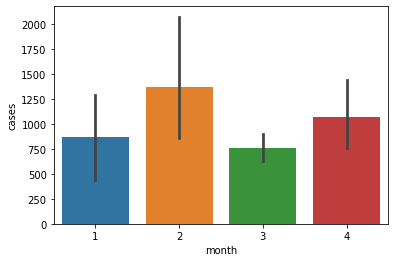

In [136]:
#Lets plot first graph of cases vs months
sb.barplot(x=d['month'],y=d['cases'])

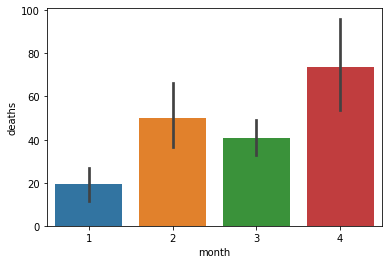

In [138]:
sb.barplot(x=d['month'],y=d['deaths'])

In [139]:
#correlation between vaariables
d.corr()

,day,month,cases,deaths
day,1.000000,-0.718840,-0.023495,-0.052709
month,-0.718840,1.000000,0.026121,0.083832
cases,-0.023495,0.026121,1.000000,0.735238
deaths,-0.052709,0.083832,0.735238,1.000000


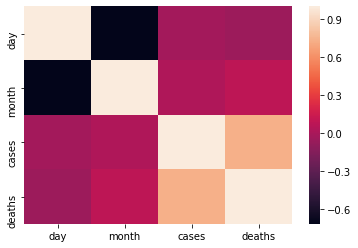

In [140]:
#This graph shows there is strong positive correlation between death and cases(0.735)
sb.heatmap(d.corr())

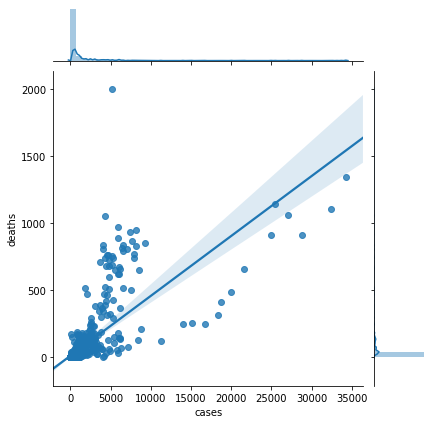

In [143]:
#To get realtionship between 2 variables
sb.jointplot(x='cases',y='deaths',data=d,kind="reg")  #hex/reg

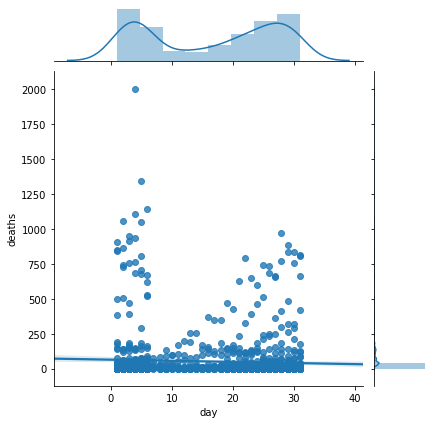

In [147]:
sb.jointplot(x='day',y='deaths',data=d,kind="reg")  #hex/reg

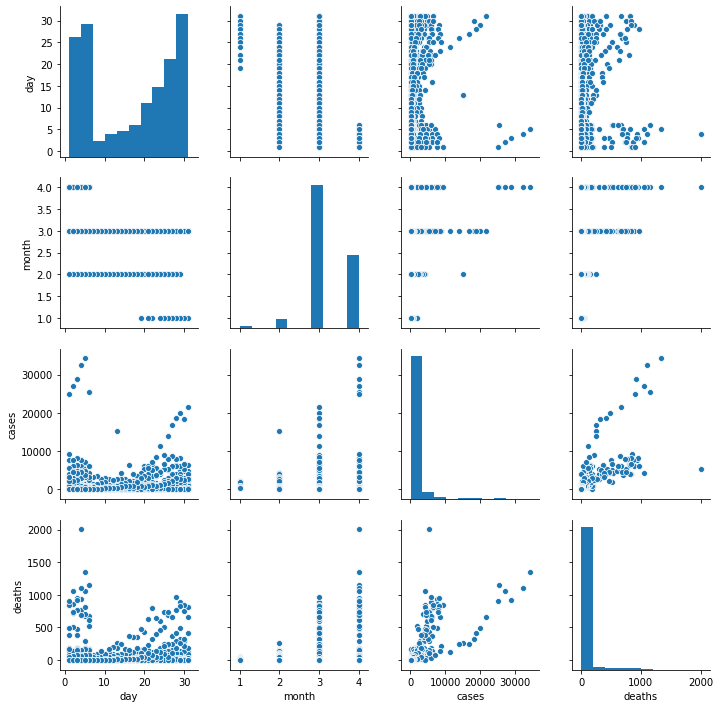

In [148]:
#To know interrelation between 2 or more features
sb.pairplot(d)

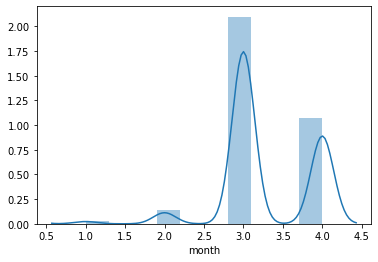

In [154]:
#Dist plot(similar to histogram)(Y axis will have pdf)

sb.distplot(d["month"],bins=10)

In [166]:
#Now let as plot graphs of data of only 3rd month

d1=d.copy()
d1=d1[d1['month']==3]
d1.shape

(840, 5)

In [167]:
d.shape   #original is safe

(1334, 5)

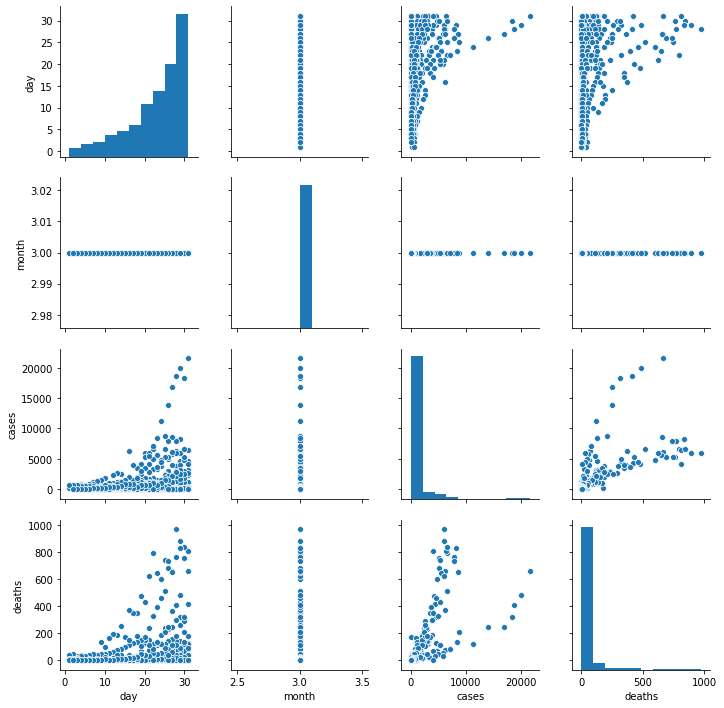

In [172]:
sb.pairplot(d1)

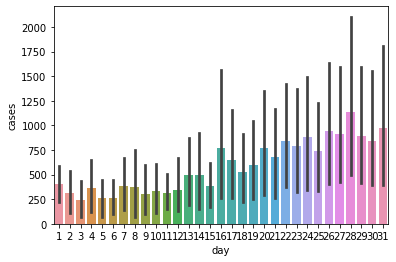

In [173]:
#Lets plot first graph of cases vs months
sb.barplot(x=d1['day'],y=d1['cases'])

Text(0, 0.5, 'Cases')

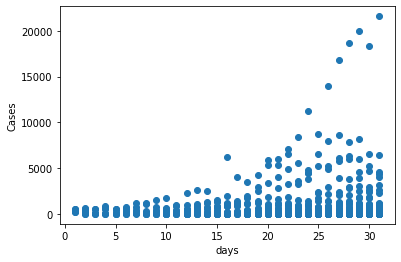

In [181]:
plt.scatter(d1['day'],d1['cases'])
plt.xlabel("days")
plt.ylabel("Cases")

In [ ]:
#Let us do analysis of USA corona cases of only 3rd month

Text(0, 0.5, 'deaths-b,Cases-R')

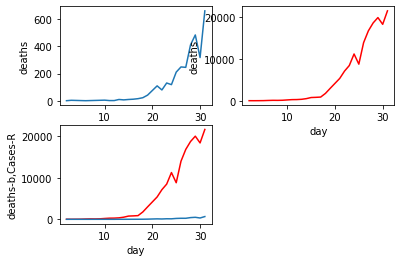

In [189]:
d2=d1[d1['countries']=='United_States_of_America']
plt.subplot(2,2,1)
plt.plot(d2['day'],d2['deaths'])
plt.xlabel("day")
plt.ylabel("deaths")
plt.subplot(2,2,2)
plt.plot(d2['day'],d2['cases'],color='r')
plt.xlabel("day")
plt.ylabel("deaths")
plt.subplot(2,2,3)
plt.plot(d2['day'],d2['cases'],color='r')
plt.plot(d2['day'],d2['deaths'])
plt.xlabel("day")
plt.ylabel("deaths-b,Cases-R")

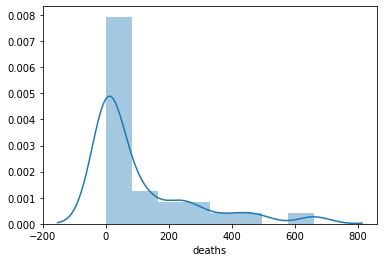

In [191]:
#Dist plot(similar to histogram)(Y axis will have pdf)

sb.distplot(d2["deaths"])

In [193]:
d3=d[d["countries"]=='United_States_of_America']
d3.head()

,day,month,cases,deaths,countries
8798,6,4,25398,1146,United_States_of_America
8799,5,4,34272,1344,United_States_of_America
8800,4,4,32425,1104,United_States_of_America
8801,3,4,28819,915,United_States_of_America
8802,2,4,27103,1059,United_States_of_America


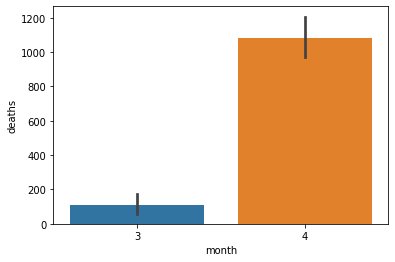

In [198]:
#bar plot (x in respect to y)
sb.barplot(x="month",y='deaths',data=d3)

C:\Users\abc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


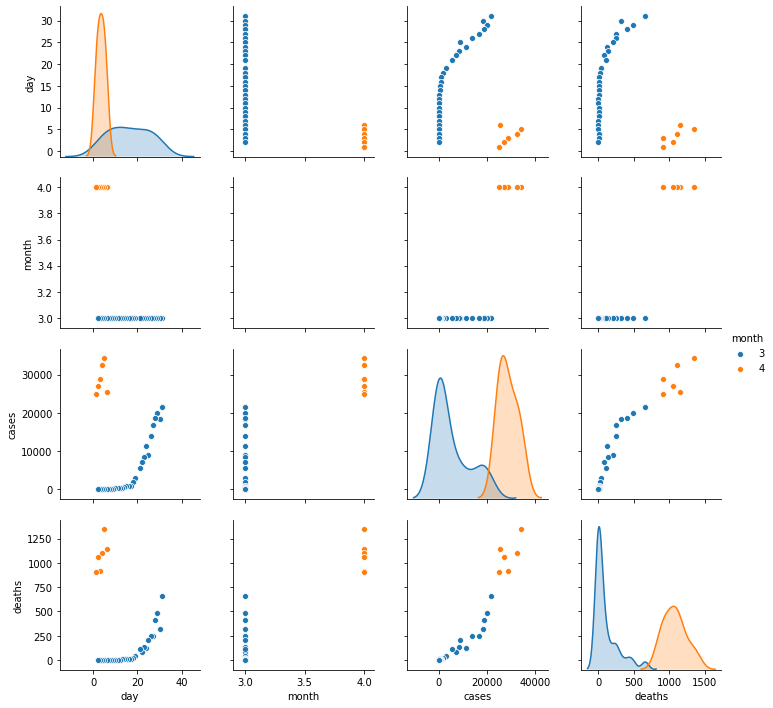

In [200]:
sb.pairplot(d3,hue='month') 

In [201]:
d4=d[d['countries']=="China"]
d4.head()

,day,month,cases,deaths,countries
1763,6,4,67,2,China
1764,5,4,48,3,China
1765,4,4,62,4,China
1766,3,4,70,10,China
1767,2,4,100,6,China


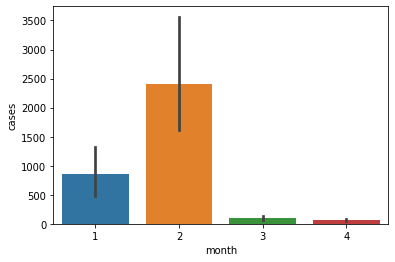

In [204]:
#bar plot (x in respect to y)
sb.barplot(x="month",y='cases',data=d4)

In [206]:
#To compare china and USA
d4.head()

,day,month,cases,deaths,countries
1763,6,4,67,2,China
1764,5,4,48,3,China
1765,4,4,62,4,China
1766,3,4,70,10,China
1767,2,4,100,6,China


In [207]:
d3.head()

,day,month,cases,deaths,countries
8798,6,4,25398,1146,United_States_of_America
8799,5,4,34272,1344,United_States_of_America
8800,4,4,32425,1104,United_States_of_America
8801,3,4,28819,915,United_States_of_America
8802,2,4,27103,1059,United_States_of_America


In [211]:
d5=pd.concat([d3,d4])
d5['countries'].unique()

array(['United_States_of_America', 'China'], dtype=object)

Text(0, 0.5, 'deaths')

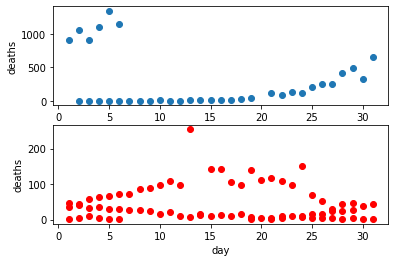

In [217]:
plt.subplot(2,1,1)
plt.scatter(d3['day'],d3['deaths'])
plt.xlabel("day")
plt.ylabel("deaths")
plt.subplot(2,1,2)
plt.scatter(d4['day'],d4['deaths'],color='r')
plt.xlabel("day")
plt.ylabel("deaths")

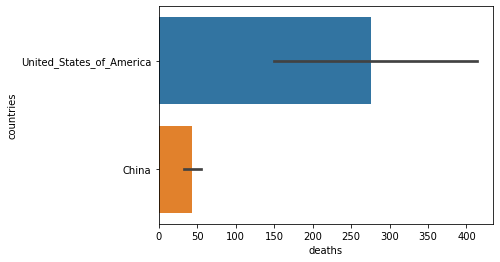

In [221]:
#bar plot (x in respect to y)
sb.barplot(x=" Average deaths",y='countries',data=d5)